This assignment serves three purposes:

--> Introducing you to RandomForestClassifier
--> Trying to implement Dense CNN model using the skills you gained till now

This assingemnt might not contain a line to line explaination of the task to be performed. You got to start visiting the documentations or any example online to help you out with queries like syntax and parameters.

The third and the most crucial purpose of all is helping you understand how to implement different models for the same task.
Here, we have given you the task of hand-written digit classification on MNIST dataset, first using RandomForestClassifier and second using Dense CNN and if you wish, you could also try to implement this task from the model of previous assingment with of-course a little bit of tweaking. 

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [24]:
import matplotlib.pyplot as plt 

In [25]:
from scipy.io import loadmat
# set path of dataset to mnist_path varaible and loadmat() it to mnist_raw
mnist_path = "mnistdata/mnist.mat"
mnist_raw = loadmat(mnist_path)


mnist ={ "data":mnist_raw["data"].T,"target":mnist_raw["label"][0],
         "COL_NAMES":["label","data"],"DESCR": "mldata.org dataset:mnist-original",
       }

In [26]:
X = mnist["data"]
Y = mnist["target"]

print("Shape of X:"+str(X.shape))
print("Shape of Y:"+str(Y.shape))

Shape of X:(70000, 784)
Shape of Y:(70000,)


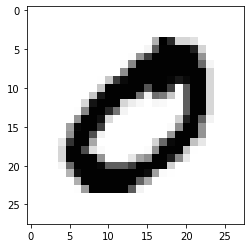

In [27]:
plt.imshow(mnist["data"][16].reshape(28,28), cmap='Greys', interpolation='None')


In [28]:
# To randomize out data set we have to shuffle it
#np.random.permutation() gives us an np.array of numbers in range given range
#  reshuffle X and y
np.random.seed(42)
random_index = np.random.permutation(len(X)) 
X = X[random_index]/255.0
Y = Y[random_index]

x_train, x_test = X[:60000], X[60000:]
y_train, y_test = Y[:60000], Y[60000:]

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

#create a rondom forest classifier with random state of 42 and fit your train varaibles 
model1 = RandomForestClassifier(random_state=42)
model1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
y_predicted_train = model1.predict(x_train)
mean_absolute_error(y_train, y_predicted_train)

0.0

In [31]:
y_predicted_test = model1.predict(x_test)
mean_absolute_error(y_test, y_predicted_test)

0.1152

In [32]:
accuracy_score(y_test, y_predicted_test)

0.9698

In [11]:
# Now that RandonForest has been explored, we'll be implementing Dense CNN model

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization, Conv2D, MaxPooling2D, Flatten
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD, Adadelta
from keras.utils import to_categorical
# keras initializer


Using TensorFlow backend.


In [13]:
batch_size = 128
num_classes = 10
epochs = 12

In [14]:
x_train = x_train.reshape(len(x_train), 28,28,1)
x_test = x_test.reshape(len(x_test), 28,28,1)

In [15]:
print(x_test.shape, x_train.shape)
print(y_test.shape, y_train.shape)

(10000, 28, 28, 1) (60000, 28, 28, 1)
(10000,) (60000,)


In [16]:
# model
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding = "valid", activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(loss=categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])

In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 39s 656us/step - loss: 0.1765 - accuracy: 0.9461 - val_loss: 0.0598 - val_accuracy: 0.9804
Epoch 2/12
60000/60000 [==============================] - 40s 669us/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0433 - val_accuracy: 0.9863
Epoch 3/12
60000/60000 [==============================] - 43s 710us/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0414 - val_accuracy: 0.9878
Epoch 4/12
60000/60000 [==============================] - 45s 757us/step - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 5/12
60000/60000 [==============================] - 43s 719us/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.0334 - val_accuracy: 0.9901
Epoch 6/12
60000/60000 [==============================] - 41s 678us/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0404 - val_accuracy: 0.9900
Epoch 7/12
60000/60000 [==============================] 

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
# After fitting try your model with test dataset
# see the accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03834672158277381
Test accuracy: 0.9918000102043152


In [22]:
# Understand how and where to use which model and jot down your observations in a text file in the github repository.